In [1]:
import torch
import torchvision.transforms as transforms
from fvd import FrechetInceptionDistance
from gif_dataset import GIFDataset
from torch.utils.data import DataLoader

In [2]:
fd = FrechetInceptionDistance()

i3d_torchscript.pt


/home/s_gladkykh/miniconda3/envs/sky_diffusion/lib/python3.11/site-packages/torch/nn/parallel/data_parallel.py:32: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 1 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


In [3]:
folder_path = '/home/s_gladkykh/thesis/gif_dataset_64'
transform = transforms.Compose([
    transforms.ToTensor(),
])
dataset = GIFDataset(folder_path, transform=transform)
train_dataloader = DataLoader(dataset=dataset, batch_size=50, shuffle=True)

In [4]:
sample = (((next(iter(train_dataloader)).view(-1,20,3,64,64)[0][0] + 1) / 2).clamp(0, 255).to(torch.uint8))

In [5]:
sample.shape

torch.Size([3, 64, 64])

In [6]:
%%time
for real_batch in train_dataloader:
    fd.update(real_batch, is_real=True)

/home/s_gladkykh/miniconda3/envs/sky_diffusion/lib/python3.11/site-packages/torch/nn/modules/module.py:1501: UserWarning: operator() profile_node %64 : int[] = prim::profile_ivalue(%62)
 does not have profile information (Triggered internally at ../third_party/nvfuser/csrc/graph_fuser.cpp:104.)
  return forward_call(*args, **kwargs)


CPU times: user 4min 2s, sys: 1min 4s, total: 5min 7s
Wall time: 58.3 s


In [7]:
test_dataset = GIFDataset("/home/s_gladkykh/thesis/sky-diffusion/vdm_notebooks/my_samples", transform=transform)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=10, shuffle=True)

In [8]:
%%time
scores = []
for fake_batch in test_dataloader:
    fd.update(fake_batch, is_real=False)
    metric = fd.compute().item()
    print(metric)
    scores.append(metric)

726.28564453125
540.4681396484375
341.693603515625
292.10693359375
286.2952880859375
267.767822265625
252.4232177734375
238.577392578125
226.6575927734375
226.244873046875
220.8345947265625
219.9346923828125
218.17041015625
220.3037109375
217.15234375
219.8427734375
217.5137939453125
217.110595703125
213.297119140625
215.93603515625
210.2532958984375
198.1890869140625
196.9407958984375
197.6732177734375
201.3863525390625
194.3807373046875
193.6893310546875
192.7655029296875
187.205810546875
174.69189453125
176.6934814453125
177.4970703125
177.9036865234375
177.550537109375
177.114501953125
174.9310302734375
174.3758544921875
169.8856201171875
171.9981689453125
171.9173583984375
170.94384765625
171.6097412109375
171.902587890625
170.0589599609375
171.46142578125
173.779052734375
175.54541015625
177.4442138671875
177.2637939453125
173.7747802734375
171.0364990234375
170.556396484375
169.8271484375
169.5670166015625
166.8797607421875
164.8004150390625
165.119140625
166.964111328125
168.22

In [9]:
fd.compute()

tensor(157.0211)

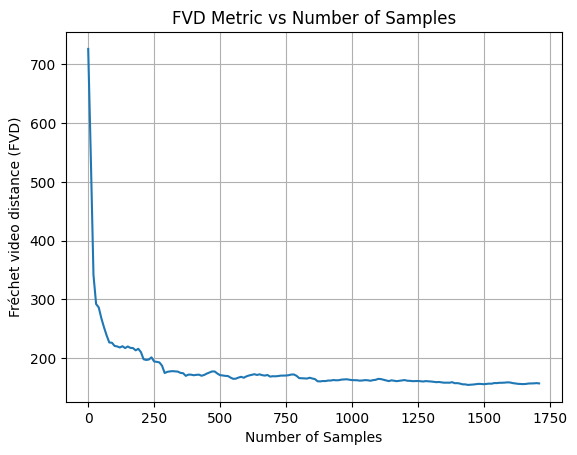

In [10]:
import matplotlib.pyplot as plt

plt.plot(list(range(0, 1720, 10)), scores)

# Add labels and title
plt.title('FVD Metric vs Number of Samples')
plt.xlabel('Number of Samples')
plt.ylabel('Fréchet video distance (FVD)')

# Show grid
plt.grid(True)

# Show plot
plt.savefig("fvd_vdm_new.png")

In [11]:
min(scores)

154.4510498046875